Four Classes Rotating Separated. Bidimensional.
100 batches of 1371 instances



METHOD: Static lp as classifier
Execution time:  3.012173032227938
Average error: 78.8255
Average macro-F1: 0.20903155189127878
Average micro-F1: 0.20999999999999996
Average Accuracy:  21.1745
Standard Deviation:  36.5002895434
Variance:  1332.27113675


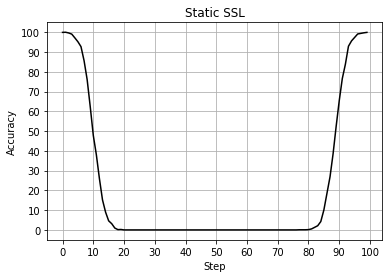

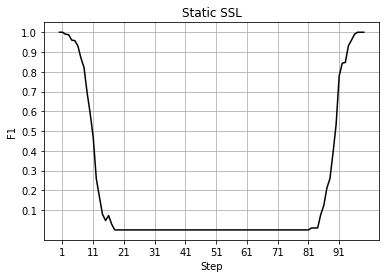

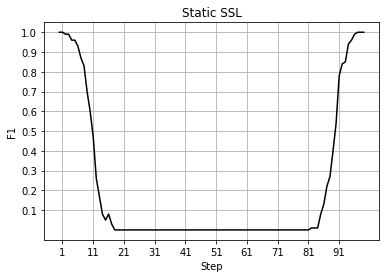




METHOD: Sliding lp as classifier
Execution time:  2.8302416473119414
Average error: 0.0162
Average macro-F1: 0.9997972346171173
Average micro-F1: 0.9998
Average Accuracy:  99.9838
Standard Deviation:  0.0314890457143
Variance:  0.00099156


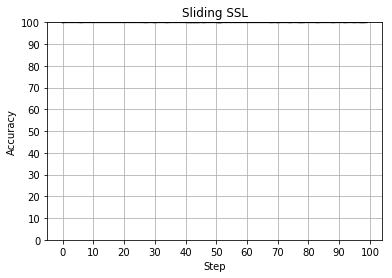

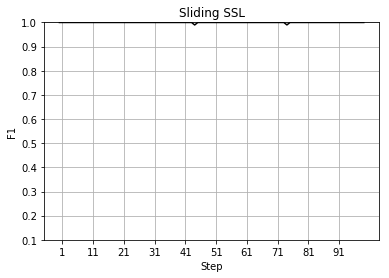

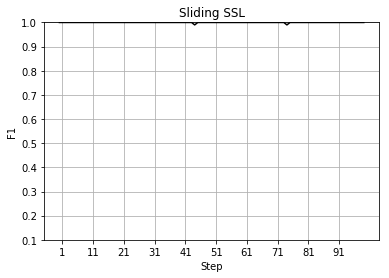




METHOD: Incremental lp as classifier
Execution time:  109.99634568045602
Average error: 78.7518
Average macro-F1: 0.21487521455496986
Average micro-F1: 0.21549999999999994
Average Accuracy:  21.2482
Standard Deviation:  36.4611856192
Variance:  1329.41805676


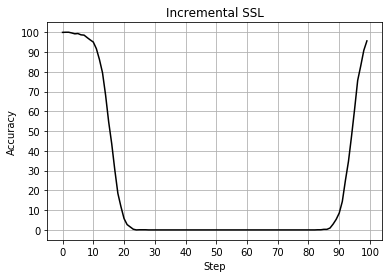

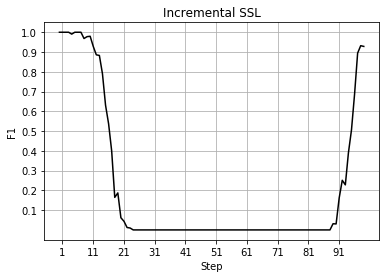

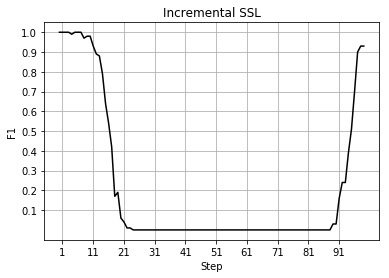




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  13.075775179940663
Average error: 0.0162
Average macro-F1: 0.9997972346171173
Average micro-F1: 0.9998
Average Accuracy:  99.9838
Standard Deviation:  0.0314890457143
Variance:  0.00099156


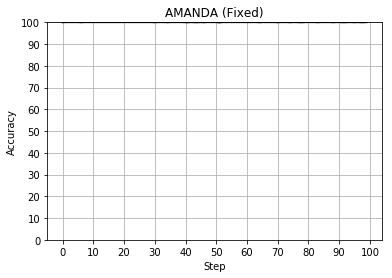

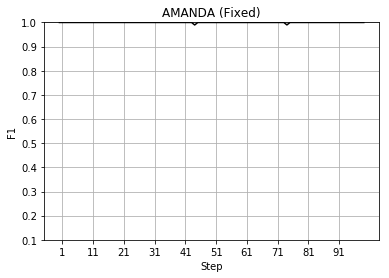

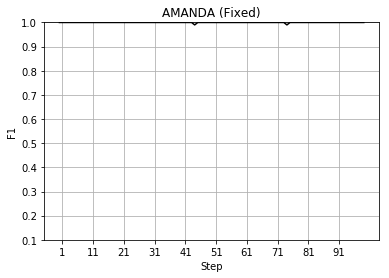




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  12.782293024279312
Average error: 0.0163
Average macro-F1: 0.9998999599839936
Average micro-F1: 0.9999000000000001
Average Accuracy:  99.9837
Standard Deviation:  0.0333962572753
Variance:  0.00111531


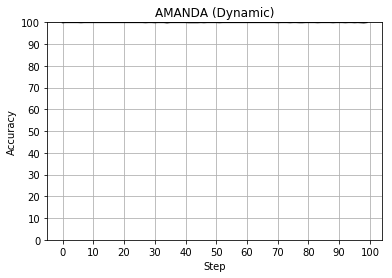

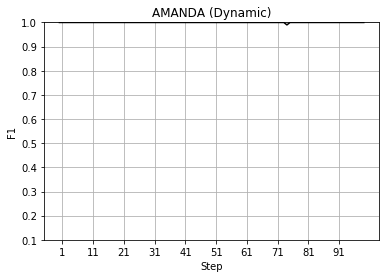

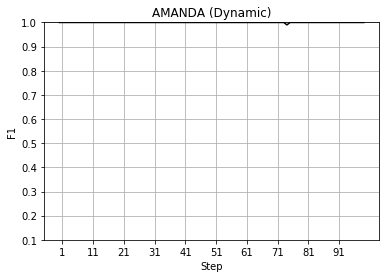




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  60.701423130301976
Average error: 0.0176
Average macro-F1: 0.9997972346171173
Average micro-F1: 0.9998
Average Accuracy:  99.9824
Standard Deviation:  0.0322837420384
Variance:  0.00104224


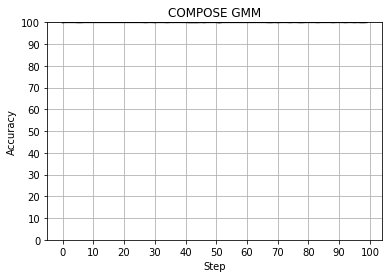

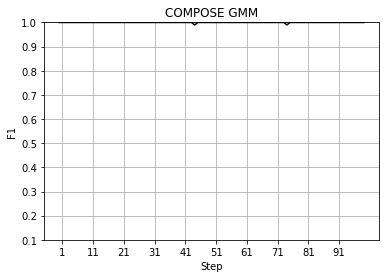

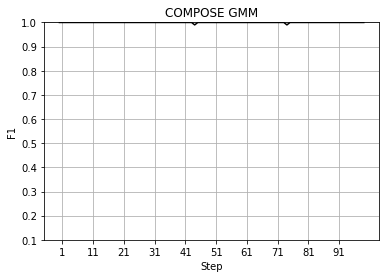




Method: Level IW
Execution time:  60.701423130301976
Average macro-F1: 0.2520984970740918
Average micro-F1: 0.2553
Average Accuracy:  99.986878
Standard Deviation:  0.0280072654145
Variance:  0.000784406916


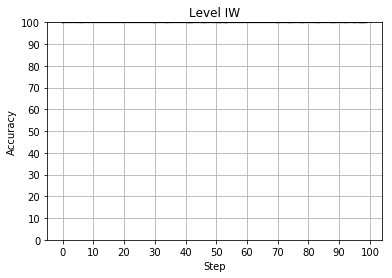

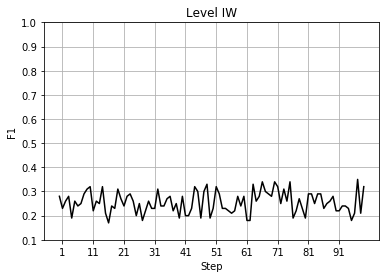

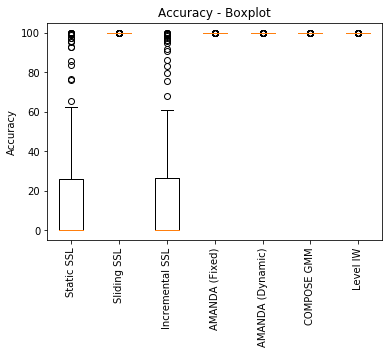

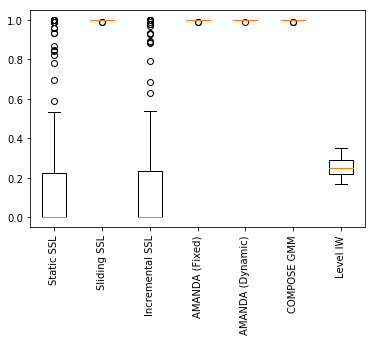

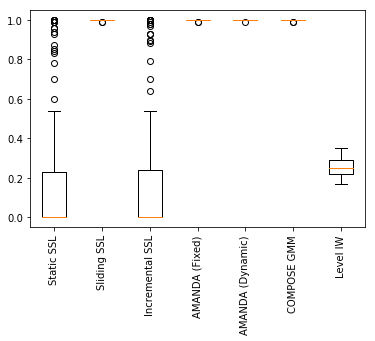

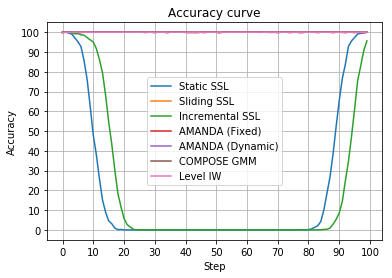

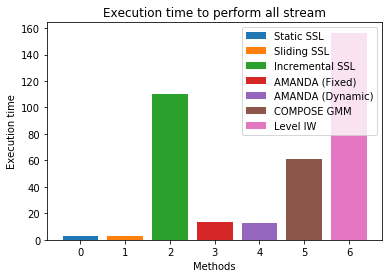

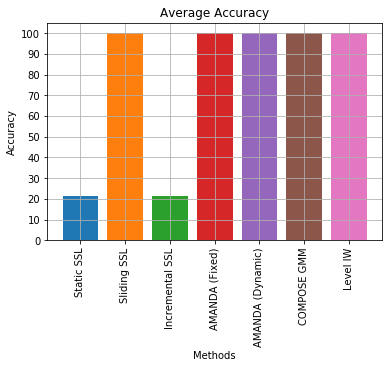

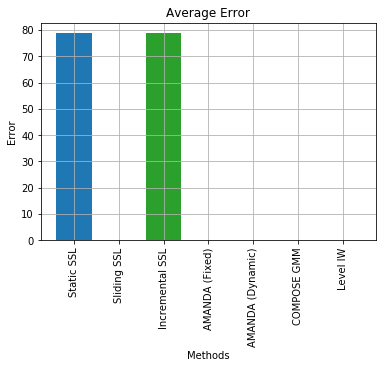

Error reduction: 372.189662094
Error reduction: 0.34806016671
Error reduction: 372.189662094
Error reduction: 372.189189827
Error reduction: 372.183050367
Error reduction: 372.204198446


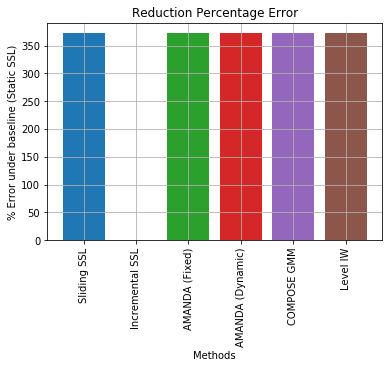

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load4CR(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 11, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 11, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 11, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 11, 0.65, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 9, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 11)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '4CR', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()